In [34]:
##PERCEPTRON
##a fundamental unit of an artificial neural network, inspired by the biological neuron, and used for binary classification tasks


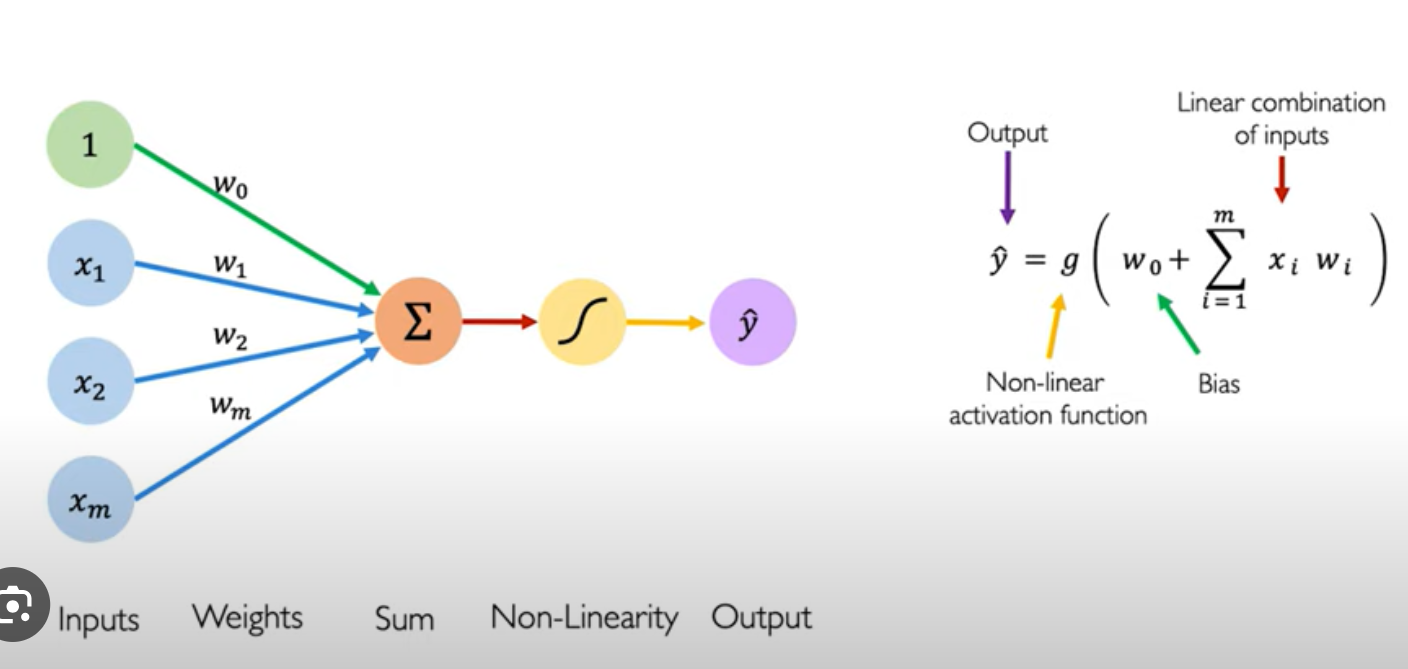

In [35]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [36]:

breast_cancer = sklearn.datasets.load_breast_cancer()

In [37]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target

* X as set of freature and y as class Label
* In this case we looking for primary classification problem whether a particular tissue is malignant and benign
  * Malignant means it has cancerous nature
  * Benign means it does't has cancer

In [38]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [39]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [40]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [42]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [43]:
data.groupby('class').mean()
# pd.set_option('display.max_columns', 100)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


<function matplotlib.pyplot.show(close=None, block=None)>

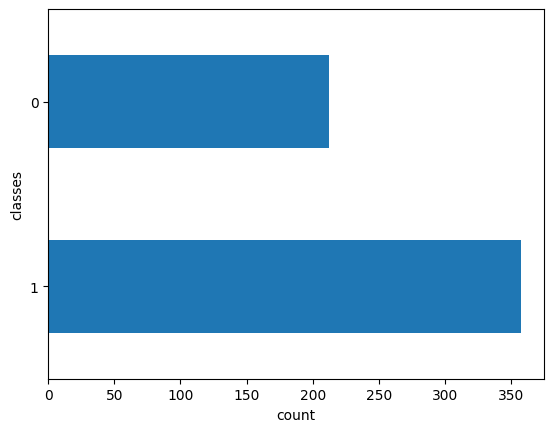

In [44]:
# ploting a graaph to see class imbalance
data['class'].value_counts().plot(kind = "barh")
plt.xlabel("count")
plt.ylabel("classes")
plt.show

In [45]:
X = data.drop("class", axis = 1)
Y = data['class']

In [46]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, stratify = Y, random_state=1)

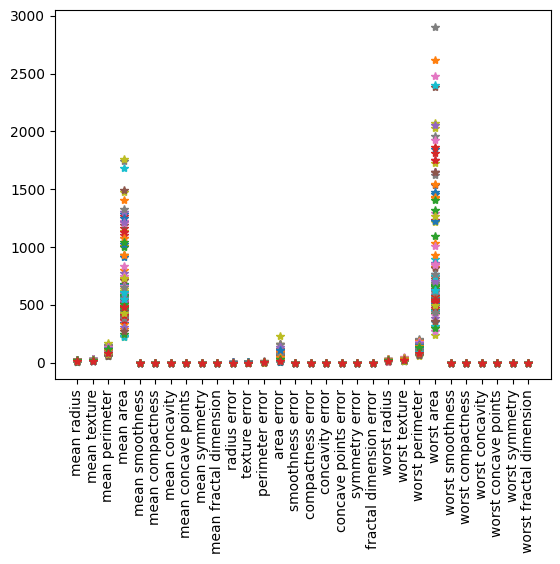

In [47]:
plt.plot(X_test.T, '*')
plt.xticks(rotation= 'vertical')
plt.show()

In [48]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

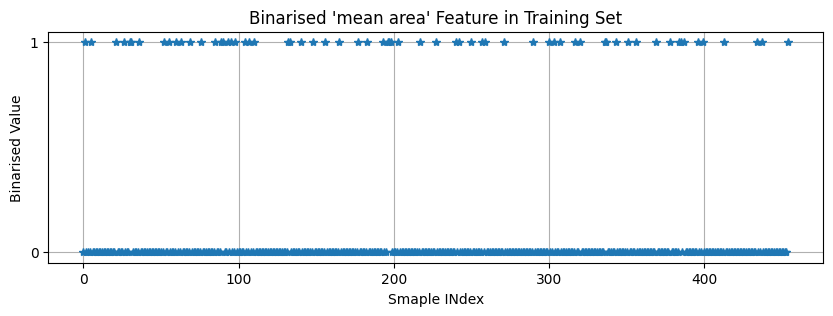

In [49]:
plt.figure(figsize=(10,3 ))
plt.plot(X_binarised_3_train.values, '*')
plt.title("Binarised 'mean area' Feature in Training Set")
plt.xlabel('Smaple INdex')
plt.ylabel('Binarised Value')
plt.yticks([0, 1])
plt.grid(True)
plt.show()

In [50]:
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels=[1, 0])


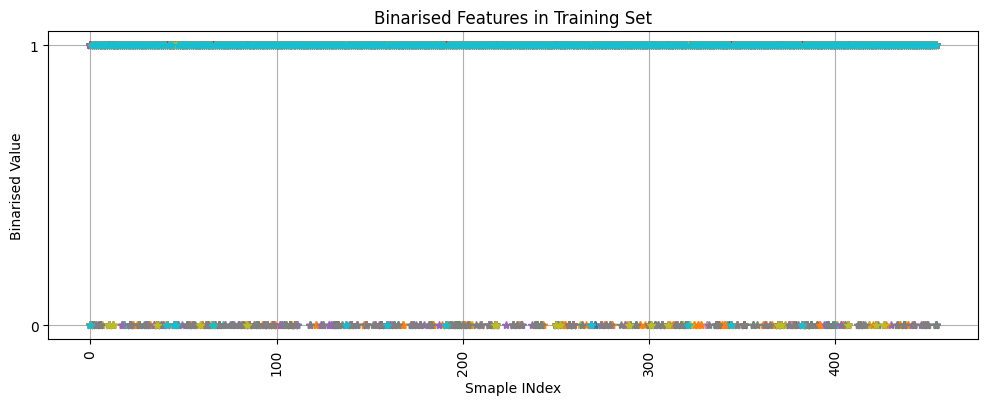

In [51]:
plt.figure(figsize=(12, 4 ))
plt.plot(X_binarised_tarin.values, '*')
plt.title("Binarised Features in Training Set")
plt.xlabel('Smaple INdex')
plt.ylabel('Binarised Value')
plt.yticks([0, 1])
plt.xticks(rotation = 'vertical')
plt.grid(True)
plt.show()

In [52]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [53]:
type(X_binarised_test)

pandas.core.frame.DataFrame

In [54]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values


In [55]:
type(X_binarised_test)

numpy.ndarray

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
X_train = X_train.values
X_test = X_test.values

In [58]:
class Perceptron:
    def __init__(self):
        self.w = None
        self.b = None

    def model(self, x):
        return 1 if (np.dot(self.w, x) + self.b) >= 0 else 0

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y, epochs=1, lr=1):
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        max_accuracy = 0
        chkptw = self.w.copy()
        chkptb = self.b

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + lr * x
                    self.b += lr * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.b -= lr * 1

            accuracy[i] = accuracy_score(Y, self.predict(X))
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                chkptw = self.w.copy()
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb

        print("Max Accuracy: ", max_accuracy)

        plt.plot(list(accuracy.values()))
        plt.ylim([0, 1])
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")

In [59]:
perceptron = Perceptron()

Max Accuracy:  0.8857142857142857


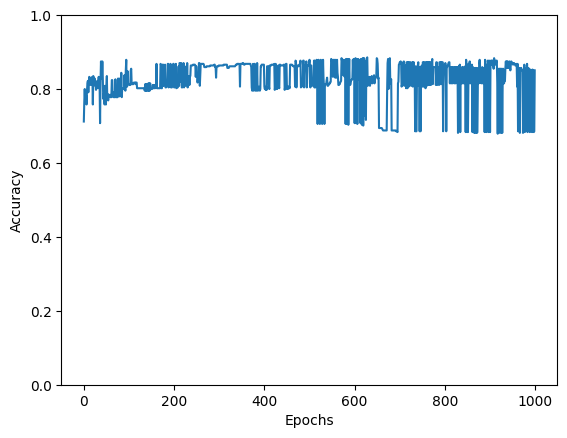

In [60]:
perceptron.fit(X_train, Y_train, 1000, 0.0001)

In [61]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_test, Y_pred_test))


0.9210526315789473


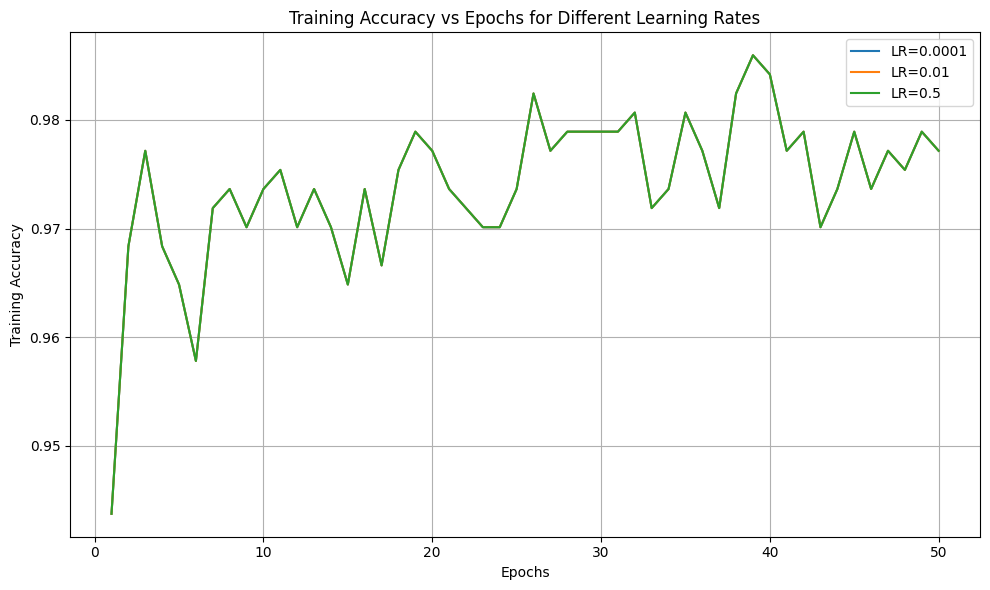

In [62]:
# Re-import necessary packages after code execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Reload dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target

# Implementing Simple Perceptron from Scratch
class SimplePerceptron:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.history = []

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            correct = 0
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.learning_rate * (target - y_pred)
                self.weights += update * xi
                self.bias += update
                correct += int(y_pred == target)
            acc = correct / n_samples
            self.history.append(acc)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

# Prepare data
X = df.drop(columns='class').values
y = df['class'].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Learning rates to test
learning_rates = [0.0001, 0.01, 0.5]
histories = {}

for lr in learning_rates:
    model = SimplePerceptron(learning_rate=lr, epochs=50)
    model.fit(X, y)
    histories[lr] = model.history

# Plotting training accuracy
plt.figure(figsize=(10, 6))
for lr, acc_history in histories.items():
    plt.plot(range(1, 51), acc_history, label=f'LR={lr}')
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epochs for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


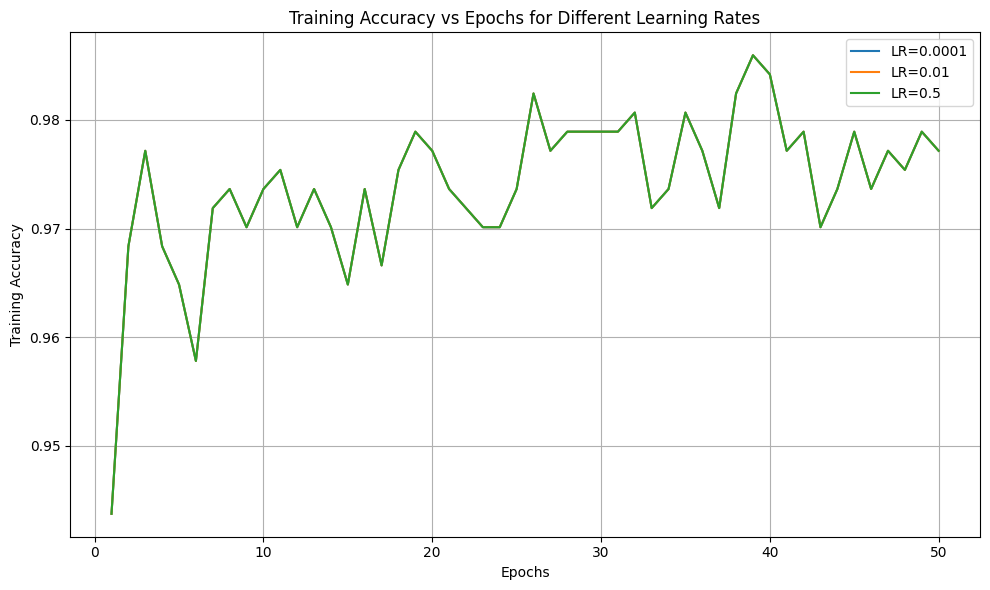

In [63]:
# Implementing a basic Perceptron from scratch to show training accuracy with different learning rates

class SimplePerceptron:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.history = []

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            correct = 0
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.learning_rate * (target - y_pred)
                self.weights += update * xi
                self.bias += update
                correct += int(y_pred == target)
            acc = correct / n_samples
            self.history.append(acc)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

# Prepare data
X = df.drop(columns='class').values
y = df['class'].values

# Normalize features for better performance
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Learning rates to test
learning_rates = [0.0001, 0.01, 0.5]
histories = {}

for lr in learning_rates:
    model = SimplePerceptron(learning_rate=lr, epochs=50)
    model.fit(X, y)
    histories[lr] = model.history

# Plotting training accuracy for each learning rate
plt.figure(figsize=(10, 6))
for lr, acc_history in histories.items():
    plt.plot(range(1, 51), acc_history, label=f'LR={lr}')
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epochs for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
